# Project 1: Sajjad Zulphekari (19200123)

#### Importing the necessary packages for data collection

In [1]:
import tweepy
import pandas as pd
import numpy as np
import json # The API returns JSON formatted text

## Step 1: Selecting the appropriate API

I decided to choose the Twitter API for this project

Twitter API requires 4 Keys for authentication which can be generated by creating a Developers account in twitter

As the keys are meant to be private and are assigned to my personal account, I have kept the keys field blank, to test this out, you can use your own private key

You can continue running from Step 3 as I have collected the tweets and submitted it along with this notebook and you dont have to perfrom the collection

#### Initializing the API keys and Tokens required for the Twitter API

In [2]:
access_token='' #your access token
access_token_secret='' #your access token secret
consumer_key='' #your consumer key
consumer_secret='' # your consumer secret 

#### Using the keys and tokens for authenticating the the API as mentioned in the tweepy documentation 

In [ ]:
# Tweepy Documentation for authentication:  http://docs.tweepy.org/en/latest/auth_tutorial.html

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

## Step 2: Collection of tweets from the Twitter API and Storage in a File

#### 1) Initializing the specific keyword we want the tweets to contain, the output text file where the tweets will be stored and the number of tweets to be collected 

In [ ]:
TRACKING_KEYWORDS = ['coronavirus'] #Since we want to only collect the tweets which have the term coronavirus in them, 
                                    #we mention that keyword here
OUTPUT_FILE = "corona_tweets.txt"  #Output will be in a json structured format stored as a txt file
TWEETS_TO_CAPTURE = 10000          #Initiazlizing the number of tweets to capture 

#### 2) Twitter Streamer Class where the tweets will be streamed and collected
#####            Making changes in the predefined StreamerListener class in tweepy by inheriting it so that we can store the streamed tweets in a file 

In [ ]:
class MyStreamListener(tweepy.StreamListener):
    """
    Twitter listener, collects streaming tweets and output to a file
    """
    def __init__(self, api=None):#defining a _init__ object to initialize the variables 
        super(MyStreamListener, self).__init__()
        self.num_tweets = 0
        self.file = open(OUTPUT_FILE, "w")

    def on_status(self, status): #making changes to on_status function in the StreamListener class inherited from tweepy
        tweet = status._json #storing one tweet at a time in the variable tweet
        self.file.write( json.dumps(tweet) + '\n' ) #Writing the tweet in a file and appending \n to it so that new tweets go to the next line
        self.num_tweets += 1 #incrementing the number of tweets collected 
        
        
        if self.num_tweets <= TWEETS_TO_CAPTURE: #using if statement to check the total number of tweets captured 
            if self.num_tweets % 100 == 0: # using this if statement to print the number of tweets captured in the intervals of 100
                print('Numer of tweets captured so far: {}'.format(self.num_tweets))
            return True
        else:
            return False
        self.file.close() #closing the file once the required number of tweets have been captured 

    def on_error(self, status): #using the predefined on_error function in streamlistener class to print errors in case of any errors 
        print(status)

#### 3) Initializing StreamListener and collecting the tweets

In [ ]:
sl = MyStreamListener() #Initializing the StreamListener 

stream = tweepy.Stream(auth, sl) # Creating a stream object with authentication 

# Filter Twitter Streams to capture data by the keywords:
stream.filter(track=TRACKING_KEYWORDS, languages = ['en']) #Using the inbuilt filter class to collect the tweets based on keywords
#Here the parameters are track where we send the keyword we want each tweet to contain and languages where we send the langague we want the tweets to be in 

## Step 3: Reading the file which has the collected tweets and  storing it in a list 

#### 1) Reading the tweets from the stored file and storing it in a list


In [3]:
tweets_data = [] #Initializing an empty list to store the tweets from the file where the tweets are saved 

# Opening the file where the tweets are stored 
with open("corona_tweets.txt", "r") as tweets_file:
    for line in tweets_file: #Reading each line from the file which is one single tweet and storing it in the list
        tweet = json.loads(line)
        tweets_data.append(tweet) #appending each tweet to the list

In [4]:
tweets_data[0] #printing a sample tweet to show how it is stored in a file 

{'created_at': 'Tue Mar 10 11:57:04 +0000 2020',
 'id': 1237346732159139842,
 'id_str': '1237346732159139842',
 'text': 'RT @debornair99: La Liga Santander confirm their next two rounds of fixtures will be played behind closed doors due to the coronavirus outb…',
 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 593638590,
  'id_str': '593638590',
  'name': 'senr_marlian🇳🇬',
  'screen_name': 'bamzyosho',
  'location': 'Ikeja, Nigeria',
  'url': None,
  'description': 'E-zero belt a thousand trousers...🤷🏼\u200d♂️ 🤡',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 711,
  'friends_count': 600,
  'listed_count': 0,
  'favourites_count': 3114,
  'statuses_count': 7997,
  'created_at': 'Tue May 29 09:

## Step 4: Loading and representing the tweets in a DataFrame.
## Applying any pre-processing steps to clean/filter/combine the data.

As for this analysis we only need the actual tweet and the location of the user profile, we only select those values from the tweets_data which is a list of dictonaries

#### 1) Filtering the required data from the tweets 

In [5]:
df1 = pd.DataFrame(columns=['location', 'text']) #Initializing the DataFrame with two columns
location = [] #Empty list where we will append the user location from all the tweets in the tweets_data list
text = [] #Empty list where we will append the actual tweet from all the tweets in the tweets_data list
for tweet in tweets_data: #Iterating through every tweet in tweets_data
     #Using the .get syntax to collect the required data from the the list
    location.append(tweet.get('user', {}).get('location', {})) #As the location of the user is under the user, 
    #we first extract the user and then from that we extract the location of that user and append it to the list
    text.append(tweet.get('text', {})) # Extracing the actual tweet text and appending it to the list
    

#### 2) Storing the tweets in a dataframe

In [6]:
df1['location'] = location #Storing each tweet location in the location column in the dataframe
df1['text'] = text  #Storing each tweet text in the text column in the dataframe
df1 #Printing the current df 

,location,text
0,"Ikeja, Nigeria",RT @debornair99: La Liga Santander confirm the...
1,None,RT @TheJessieWoo: White folks really upset tha...
2,Earth,RT @nycjim: CDC tells people over 60 or who ha...
3,Puerto Rico,"Biogen, Eli Lilly, Takeda ask staff to work fr..."
4,None,RT @hilaryluros: It’s America’s Coronavirus no...
...,...,...
9996,"İstanbul, Türkiye",RT @MustardV3VO: AYO DID THIS NIGGA WATERMARK ...
9997,None,RT @LASK_eng: Statement from the @OEFBL statin...
9998,Medfield MA,RT @dbongino: If you’re looking for hysterical...
9999,None,RT @COVID_19_News: The situation in Italian pr...


#### 3) Data cleaning 
As the location field doesnt always have a value, we will find the number of None values and delete them

In [7]:
df1['location'].isna().sum() #Finding total number of null values in location column


3202

In [8]:
df1 = df1.replace(to_replace='None', value=np.nan).dropna() #Replacing the rows which have 'None' in them with nan and then deleting them using dropna

In [9]:
df1['location'].isna().sum()


0

In [10]:
df1 = df1[~df1.text.str.startswith('RT @')] #For this analysis we dont need tweets which have been retweeted
                                            #So we remove all the tweets which begin with RT @ (Which is how Retweets begin in the twitter data)

#### 4) Data Pre-Processing 
I have decided to use the named location of each user, convert them into coordinates and then plot it on the map, to see where the users are tweeting from about coronavirus.

For this we will use the geopy package which includes a geocoder function which returns the coordinates of the Named locations

For example if the input is New York, geopy will return (40.7410861, -73.9896297241625) which are its coordinates 

Documentation: https://pypi.org/project/geopy/

In [11]:
#Importing the necessary packages 
import geopy
from geopy.extra.rate_limiter import RateLimiter
# As we are geocoding a large number of location,the geocoder might deny the request
# So We import the RateLimiter so that we can delay the requests sent to the geocoder(Nominatim) between every request
from  geopy.geocoders import Nominatim
locator = Nominatim(user_agent='geocode') #Initializing the Nominatim geocoder as the geocoder
geocode = RateLimiter(locator.geocode, min_delay_seconds=1) #Assigning a delay of 1 sec between each call to the geocoder 

The next block will take a long time to finish with the execution, So I have executed the code for the whole dataframe nad stored it in a CSV file named cleanedlocations.csv and submitted that along with the notebook. 

I have read this CSV file in the Step 5 and performed further analysis

If you want to test the code, I have created a small sample of df1 with 10 values which you can execute.

If you still want to run it for the whole dataframe, remove .head(n=10) from the next block


In [ ]:
#dftest = df1.head(n=10) #optional


In [ ]:
pd.options.mode.chained_assignment = None #to not get chained_assignment warning
dftest['location2'] = dftest['location'].apply(geocode) #Performing the geocoding and storing the value in a new column,
                                                 # We use the .apply function in pandas and pass the geocode function in it 

#This step will take a long time, so to test, use a small data set
#There might also be a 'Service Time Out error' depening on the time the request is being made and the server load on the geocoder server
#During the day chances of getting the service time out error is high but eventually the geocoder will collect the coordinates, if it doesnt, run it at a later time or during the night when the server load is low to get the output
#The geocoder server being down might also cause issues
#The geocoder will eventually return the coordinates of all the locations 

In [ ]:
dftest['point'] = dftest['location2'].apply(lambda loc: tuple(loc.point) if loc else None)
#geopy has a function .point which returns a tuple of latittude,longitutde and altitude of the location, we store this tuple in a new column 
#We use a small lambda function which iterates over every  value in location2 column and returns the tuple of lat,long and alt
#As some user locations are not actual locations, if geopy can't find the coordinates, it will insert None in its place
#Geopy Documentation: https://geopy.readthedocs.io/en/1.10.0/   Geocode with Python: https://towardsdatascience.com/geocode-with-python-161ec1e62b89


In [ ]:
dftest = dftest.dropna(how='any',axis=0)#Removing the None valuess in the dataframe (as unrecognizable locations are assigned None values)
dftest.isna().sum() #Verifying that there are no null values

In [ ]:
dftest[['latitude', 'longitude', 'altitude']] = pd.DataFrame(dftest['point'].tolist(), index=dftest.index)
#Changing the values in point column to a list and splitting them into three columns (latitude, longitude and altitude)
dftest #sample df after geocoding

## Step 5: Visualization (Part 1)
### Here I will plot the tweets on a map based on the location of the user who tweeted a particular tweet

I used the folium map package for printing maps

https://python-visualization.github.io/folium/

In [12]:
#df1.to_csv('cleanedlocations.csv')
df1 = pd.read_csv('cleanedlocations.csv')

In [13]:
import folium #Importing the folium package
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
#Initializing the map outline 
map1 = folium.Map(
    tiles='cartodbpositron', #Tiles is the type of the map we want to print as the output 
    zoom_start=12, #Zoom_start lets us choose how zoomed in we want the initial map to appear
)

#Assigning the points to the map based on the latitude and longitude from the dataframe 
df1.apply(lambda row:folium.CircleMarker(location=[row["latitude"], row["longitude"]], radius = 5).add_to(map1), axis=1)
#Creating a lambda function which iterates through all the lat and long from the df and assigns each value to
#folium.CircleMarker which is an inbuilt function in folium, used it to specify points on a map and used radius to specify radius of 
#points then used add_to to add that point on the map
map1


We can see that most of the tweets were from America and United Kingdom, In Asia, most of the tweets seem to originate from India which can be due the population of India.

### Now I will cluster the tweets based on thier area which also shows the number of tweets for a particular cluster

You can also zoom in to see smaller clusters based on area

In [15]:
locations = df1[['latitude', 'longitude']] #creating a new df with only the lat and long of tweets
locationlist = locations.values.tolist() #Creating a list of each lat long pair for plotting 
df1


,Unnamed: 0,location,text,location2,point,latitude,longitude,altitude
0,3,Puerto Rico,"Biogen, Eli Lilly, Takeda ask staff to work fr...","Puerto Rico, Orocovis, Puerto Rico, United Sta...","(18.2214149, -66.41328179513847, 0.0)",18.221415,-66.413282,0.0
1,11,The pool of life.,"Odious liar, racist, far-right extremist hate ...","{Life, Point Cook, City of Wyndham, Victoria, ...","(-37.9105144, 144.74777160224443, 0.0)",-37.910514,144.747772,0.0
2,13,"North Carolina, USA",@GMA My family has a cruise schedule in April....,"North Carolina, United States of America","(35.6729639, -79.0392919, 0.0)",35.672964,-79.039292,0.0
3,15,"Brooklyn, New York",TODAY • @prattinstitute What is Pratt doing ab...,"Brooklyn, Kings County, New York, United State...","(40.6501038, -73.9495823, 0.0)",40.650104,-73.949582,0.0
4,16,"Occoquan, VA",I'm mostly nervous about taking public transpo...,"Occoquan, Prince William County, Virginia, 221...","(38.6837271, -77.260261, 0.0)",38.683727,-77.260261,0.0
...,...,...,...,...,...,...,...,...
1175,9942,"90-92 Parkway, NW1 7AN",House price growth reaches 2.8% amid coronavir...,"Parkway, Chalk Farm, London Borough of Camden,...","(51.5366927, -0.1463341, 0.0)",51.536693,-0.146334,0.0
1176,9978,United States,Kewl. Let's send them all on cruises 😂😂😂😂😷🖕,United States,"(39.7837304, -100.4458825, 0.0)",39.783730,-100.445882,0.0
1177,9980,"Oxford, England",Saudi Arabia seals off Shia Qatif region over ...,"Oxford, Oxfordshire, South East, England, Unit...","(51.7520131, -1.2578499, 0.0)",51.752013,-1.257850,0.0
1178,9983,"Brisbane, Australia",New #COVID2019 clinics being set up in capital...,"Brisbane, Queensland, 4004, Australia","(-27.4689682, 153.0234991, 0.0)",-27.468968,153.023499,0.0


In [16]:
from folium.plugins import MarkerCluster #MarkerCluster is a function which clusters the points in a map based on the vicinity 
#of points from each other and provides a better visualization
map = folium.Map(
    tiles='cartodbpositron',
    zoom_start=12,
) #initializing a blank map

marker_cluster = MarkerCluster().add_to(map) #initializing the cluster function 

for point in range(0, len(locationlist)): #iterating through every lat-long on the list
    folium.CircleMarker(locationlist[point]).add_to(marker_cluster) #Adding points on the map using the MarkerCluster function
map

We can see out of all the tweets, 619 tweets were from North America, 381 from Europe, 106 from Asia, 50 from Africa and 21 from Oceanic region.

This map gives us a general understanding of where people tweet from. There are some outliers in this code as the geocoder couldn't accurately extract the coordinates

## Visualization (Part 2) - Text Analysis 
### Text preprocessing 

In [17]:
from nltk.corpus import stopwords #importing stopwords for tweets text preprocessing 
from nltk.stem import PorterStemmer
import nltk.sentiment.vader as vd #using the vader lexicon for sentiment analysis 
from nltk import download
download('vader_lexicon')
from nltk.tokenize import word_tokenize
swords = stopwords.words('english') #assigning the english stopwords to variable swords

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sajja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


1) Using regex to clean and then split each tweets 

In [18]:
df1['processed_text'] = df1['text'].str.lower()\
          .str.replace('(@[a-z0-9]+)\w+',' ')\
          .str.replace('(http\S+)', ' ')\
          .str.replace('([^0-9a-z \t])',' ')\
          .str.replace(' +',' ')\
          .apply(lambda x: [i for i in x.split() if not i in swords])
    
    
#Coverting all tweets to lowercase   
#Replacing any twitter usernames in the tweet starting with @
#Replacing all the links in the tweets 
#Replacing non alphanumeric text
#Replacing unnecessary blank spaces 
#Creating a lambda function which splits each word in a sentence by using .split function and only stores the word 
#which is not in the list of stopwords https://medium.com/analytics-vidhya/exploring-twitter-data-using-python-af1287ee65f1

2) Porter Stemming of cleaned tweets

In [19]:
ps = PorterStemmer() #Initializing the PorterStemmer 
df1['stemmed'] = df1['processed_text'].apply(lambda x: [ps.stem(i) for i in x if i != ''])
#Creating a new column for stemmed sentences, then we create a lambda function which iterateres through every word in a 
#sentence and perform the stemming function on the word


#### 1: WordCloud
Now we will create a wordcloud to see have a pictoral representation of the most used words

In [20]:
from wordcloud import WordCloud


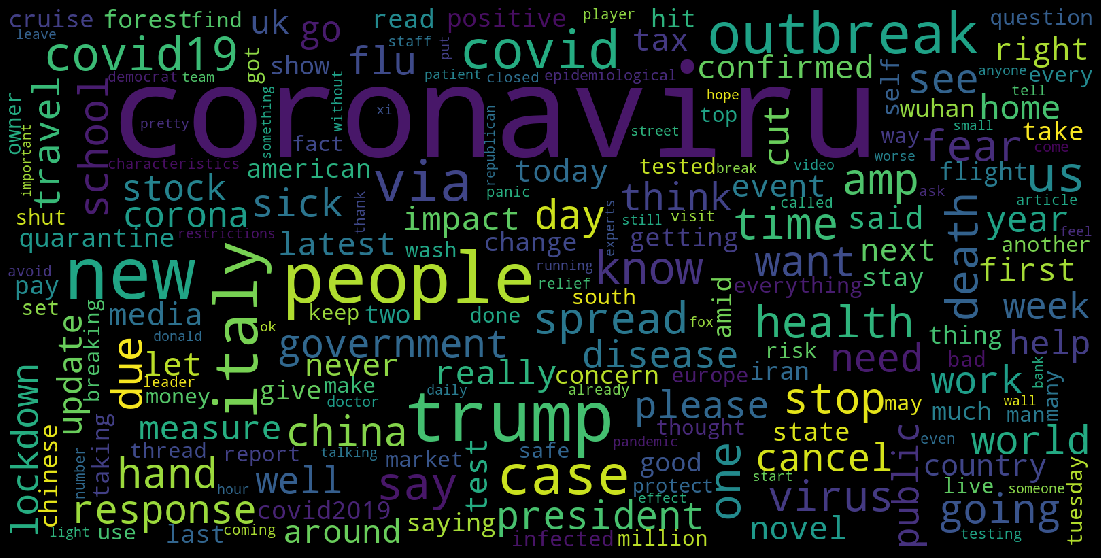

In [21]:
bigstring = df1['processed_text'].apply(lambda x: ' '.join(x)).str.cat(sep=' ')
#using a lambda function to iterate over every preprocessed tweet and using .cat function to concatenate each word and store it
#in one long string for the wordcloud 

plt.figure(figsize=(20,10),facecolor='k' ) #Initializing  the figure size
plt.tight_layout(pad=0)
wordcloud = WordCloud(                 #initializing the wordcloud 
                          background_color='blacK', #setting backgroud color 
                          collocations=False, #Setting this False as we dont want it to include bigrams 
                          width=1600,
                          height=800 #setting width and height of the wordlcoud 
                         ).generate(bigstring) #passing the long string whose wordcloud we want to generate 
plt.axis('off') #Removing the axis around the plot as it is not required 
plt.imshow(wordcloud) 


As expected coronavirus will be the most used word,but after that surpirsingly trump is the most used word, he is always in the news no matter what the topic is

Italy is also a commonly used term as it is one of the most affected area by coronavirus

#### 2. Most user mentions 
Now we will check that which user has the most mentions in tweets regarding coronavirus

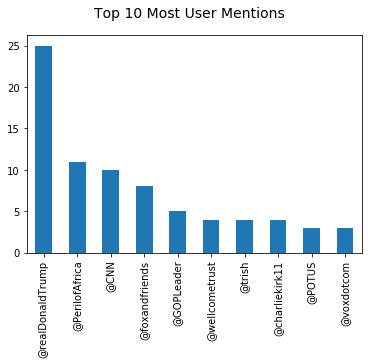

In [22]:
plt.grid(False)

plt.suptitle('Top 10 Most User Mentions', fontsize=14)
df1['text'].str\
          .findall('(@[A-Za-z0-9]+)')\
          .apply(lambda x: pd.value_counts(x))\
          .sum(axis=0)\
          .sort_values(ascending=False)[:10]\
          .plot(kind='bar')
#we will search the text column as the processed_text has this information removed 
#We will find every occurence of a user by using str.findall by checking words beginning with @
#findall returns a list of string for each occurence (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.findall.html)
#Then we create a lambda function where we use value_counts to count the words in each tweet and store it in a df where columnnames are each mentioned user, we do this for all tweets
#Then we sum it accross all columns 
#Then we sort it and select the 10 most mentioned users and plot it in a bar 

Again we can see Donald Trump was mention the most even in tweets regarding coronavirus.

Another surprising thing to see is that PerilofAfrica which is a very small African news page is the second most mentioned user handle

#### 3. Most used Hashtags
Now we will find the most used hashtags 

In [23]:
import re #importing regex to find hashtags 
hashtags = df1['text'].apply(lambda x: pd.value_counts(re.findall('(#\w+)', x.lower() )))\
                     .sum(axis=0)\
                     .sort_values(ascending=False)
#creating a new df where use not not processed text to find the most hashtag occurences
#Creating a lambda function where we find occurences of all the words starting with # and convert it to lowercase for consistency
#Then sum them column wise and and sort them in descending order
hashtags.columns = ['hashtag','occurences'] #renaming the columns 

Text(0.5, 0.98, 'Top 8 most used hashtags')

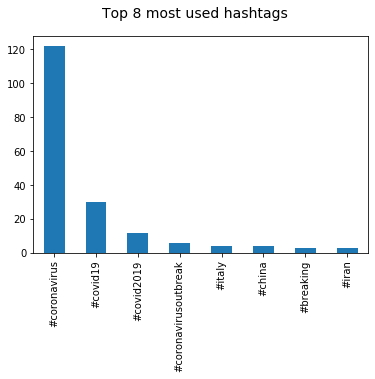

In [24]:
hashtags[:8].plot(kind='bar',y='occurences',x='hashtag') #creating the bar okit 
plt.grid(False)
plt.suptitle('Top 8 most used hashtags', fontsize=14)

As expected coronavirus and covid19 are the most used hashtags, a funny observation is that some users are confusing the 19 in covid19 as the year 2019 and using it in hashtags

Italy, China and Iran were the most affected countries during the time of collection of tweets hence they had the highest number of used hashtags

#### 4. Most used words in tweets regariding coroavirus
Now we will find which words are used the most in tweets related to coronavirus 

In [25]:
words = df1['processed_text'].apply(lambda y: pd.value_counts(re.findall('([\s]\w+[\s])',' '.join(y))))\
                            .sum(axis=0)\
                            .sort_values(ascending=False)
#we use the processed tweets as we want to do a word count for each word, we create a lambda function where we do a value count
#for each word, we search for distinct words using regex, the search is done based on spaces"[\s]" between each word
#then we sum each word column wise and sort it in descending order

words.columns = ['word','occurences'] #Renaming the columns 

Text(0.5, 0.98, 'Top 10 most used words')

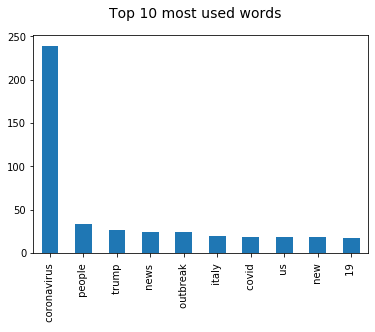

In [26]:
words[:10].plot(kind='bar',y='occurences',x='word') #creating the bar plot 
plt.grid(False)
plt.suptitle('Top 10 most used words', fontsize=14)

Coronavirus is the most used word but again trump is present in the tweets regarding coronavirus, looks like trump is at the centre of every major topic happpening around the world.

#### 5. Sentiment Analysis 
Now we will perform sentiment analysis to check if tweets about coronavirus are mainly negative or positive

In [27]:
#Initializing the sentiment analyzer 
sia = vd.SentimentIntensityAnalyzer()

In [28]:
df1['sentiment_score'] = df1['processed_text'].apply(lambda x: sum([ sia.polarity_scores(i)['compound'] for i in word_tokenize( ' '.join(x) )]) )
#we create a lambda function where We use tokenizer to tokenize the words so that we can feed one word to the sentiment analyzer
#at a time and them sum up the sentiment score of each word for a particular tweet and store it in a new column

df1['sentiment_score'] = df1['sentiment_score'].apply(lambda x: round(x,)) #we then round off the sentiment scores for better visualization

In [29]:
#Now we perform binning so that we can visualize this data in a better way
sent_classification = pd.cut(df1['sentiment_score'],\
          [-3,-1.2, 0, 1.2 , 3],\
          right=True,\
          include_lowest=True,\
          labels=['strongly negative', 'negative', 'positive', 'strongly positive']) #assigning labels to corresponding sentiment
#We store this value in a new variable sent_classification for plotting

#### Bar Graph showing number of tweets based on thier senitment

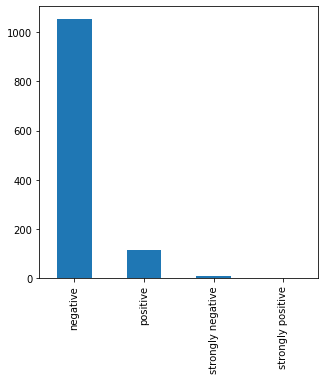

In [30]:
plt.figure(figsize=(5,5)) #make it smaller this time
sent_classification.value_counts().plot(kind='bar')
plt.grid(False)



We can see most of the tweets are negative which is understandable as coronavirus has a negative conscience around it.

## Final Visualization
#### Now we will try to plot tweets based on thier sentiment to see from where people are tweeting positive/negative things regarding coronavirus

The inspiration for this visualization came after I read about a research paper in my Text Analysis Module where the authors predicted the path of a hurricane based on the location of tweets.

My idea was to visualize which areas in the world are tweeting postive tweets about coronavirus and which areas are tweeting negative tweets, this will give us a general understanding of high affected areas and areas which are recovering.

This reseach paper also proposes how twitter data can be used for disaster management
https://link.springer.com/article/10.1007/s10479-017-2522-3

In [31]:
#Creating a function where we assign color to each sentiment
#Red to negative tweets, green to positive tweets and darkblue to neutral tweets
def sentimentcolors(counter):
    if counter['sentiment_score'] == -3:
        return 'red'
    elif counter['sentiment_score'] == -2:
        return 'red'
    elif counter['sentiment_score'] == -1:
        return 'red'
    elif counter['sentiment_score'] == 1:
        return 'green'
    elif counter['sentiment_score'] == 2:
        return 'green'
    else:
        return 'darkblue'
    
df1["color"] = df1.apply(sentimentcolors, axis=1) #Color coding each tweet based on its sentiment and storing it in a new column


In [32]:
#Creating a new df which only stores the lat, long and the color of each sentiment which is required to plot the map
sentidf = df1[['latitude', 'longitude', 'color']]
sentidf = sentidf[sentidf.color != 'darkblue'] #Removing all the entries which have a neutral polatrity as we only want the
#positive and negative tweets 
sentidf

,latitude,longitude,color
1,-37.910514,144.747772,red
9,35.413520,127.391525,red
12,51.507322,-0.127647,red
24,54.702355,-3.276575,red
28,34.851354,-82.398488,green
...,...,...,...
1157,51.507322,-0.127647,green
1166,39.783730,-100.445882,green
1170,40.712728,-74.006015,red
1173,54.702355,-3.276575,green


In [33]:
map = folium.Map(
    tiles='cartodbpositron',
    zoom_start=12,
) #initializing the map

for index, row in sentidf.iterrows(): #using iterrows to iterate through the df
    folium.CircleMarker([row['latitude'], row['longitude']],
                    radius=1, color=row['color']).add_to(map)
#Circle marker has a argument color which can be used to assign color to the point on the map, we use the color value of each
#lat-long pair and plot the point according to that
map

We can see most of the tweets in America have a negative sentiment, surprisingly many tweets in UK had a positive Sentiment.

In Ireland, everyone had only negative things to say about coronavirus

### Conclusion
As I have used user location based on what they set in thier profile, the results are not a very accurate representation of the tweet location but for a large dataset it gives an overall accurate result. To make this more robust, we can use the co-odrinates of the location of the user from where they are currently tweeting (but this co-ordinate is generally disabled and not availabe) but these coordinates are not readily available.
During a disaster, this type of location + sentiment analysis can be used for a particular location and check the sentiments to see which area is worst hit by the disaster and